In [9]:
# 1. Importar bibliotecas
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 2. Gerar dados com múltiplas entradas
X_np, y_np = make_classification(n_samples=500, n_features=2, n_informative=2,
                                 n_redundant=0, n_classes=2, random_state=42)

# 3. Convertendo para PyTorch
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np.reshape(-1,1), dtype=torch.float32)


In [10]:
class LogisticModelMulti(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)  # Agora com 2 entradas

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [11]:
model = LogisticModelMulti()
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

losses = []
for epoch in range(200):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())


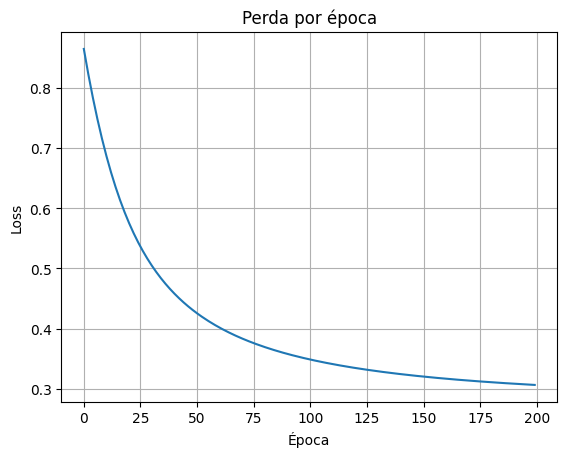

In [12]:
plt.plot(losses)
plt.title("Perda por época")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


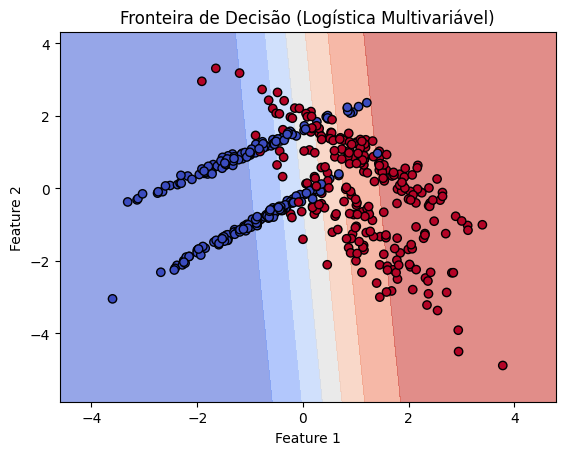

In [13]:
from matplotlib.colors import ListedColormap

# Grade de pontos
x_min, x_max = X_np[:, 0].min()-1, X_np[:, 0].max()+1
y_min, y_max = X_np[:, 1].min()-1, X_np[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Previsões
with torch.no_grad():
    preds = model(grid).reshape(xx.shape)

# Visualização
plt.contourf(xx, yy, preds, cmap="coolwarm", alpha=0.6)
plt.scatter(X_np[:,0], X_np[:,1], c=y_np, edgecolor='k', cmap='coolwarm')
plt.title("Fronteira de Decisão (Logística Multivariável)")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
plt.show()
